<a href="https://colab.research.google.com/github/PrajwalRaj21/DataScienceRepo/blob/main/CattleDistribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the necessary Libraries**

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


drive.mount('/content/drive')

# Load your dataset
file_path = '/content/drive/MyDrive/gorkha data.csv'
data = pd.read_csv(file_path)


data.head()


Mounted at /content/drive


,Districts,VDC/Municipality,Cattle,Buffalo,Yak/ Nak/ Chauri,Sheep,Goat,Pig
0,Gorkha,Aanppipal,1405,1219,-,-,5418,195
1,Gorkha,Aaru Arbang,1868,1342,3,28,3688,58
2,Gorkha,Aaru Chanaute,630,787,6,15,2321,26
3,Gorkha,Aarupokhari,1487,1875,8,6,5611,12
4,Gorkha,Asrang,993,1386,5,-,4473,100


In [2]:
data.describe()

,Cattle
count,68.000000
mean,2739.676471
std,11152.457907
min,2.000000
25%,956.750000
50%,1240.000000
75%,1689.750000
max,93149.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Districts         68 non-null     object
 1   VDC/Municipality  68 non-null     object
 2   Cattle            68 non-null     int64 
 3   Buffalo           66 non-null     object
 4   Yak/ Nak/ Chauri  68 non-null     object
 5   Sheep             66 non-null     object
 6   Goat              68 non-null     object
 7   Pig               68 non-null     object
dtypes: int64(1), object(7)
memory usage: 4.4+ KB


In [4]:
data.isnull().sum()

,0
Districts,0
VDC/Municipality,0
Cattle,0
Buffalo,2
Yak/ Nak/ Chauri,0
Sheep,2
Goat,0
Pig,0


In [12]:
print(data.columns)

Index(['Districts', 'VDC/Municipality', 'Cattle', 'Buffalo',
       'Yak/ Nak/ Chauri', 'Sheep', 'Goat', 'Pig'],
      dtype='object')


In [13]:
# Rename columns to remove spaces/special characters
data.columns = data.columns.str.replace(' ', '_').str.replace('/', '_')

# Print the updated column names
print(data.columns)


Index(['Districts', 'VDC_Municipality', 'Cattle', 'Buffalo',
       'Yak__Nak__Chauri', 'Sheep', 'Goat', 'Pig'],
      dtype='object')


In [5]:

data.fillna(method='ffill', inplace=True)
data.dropna(inplace=True)

<ipython-input-5-1eba6952f6a3>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Example: Forward fill missing values


# **Distribution of Cattle across VDC/Municipality**

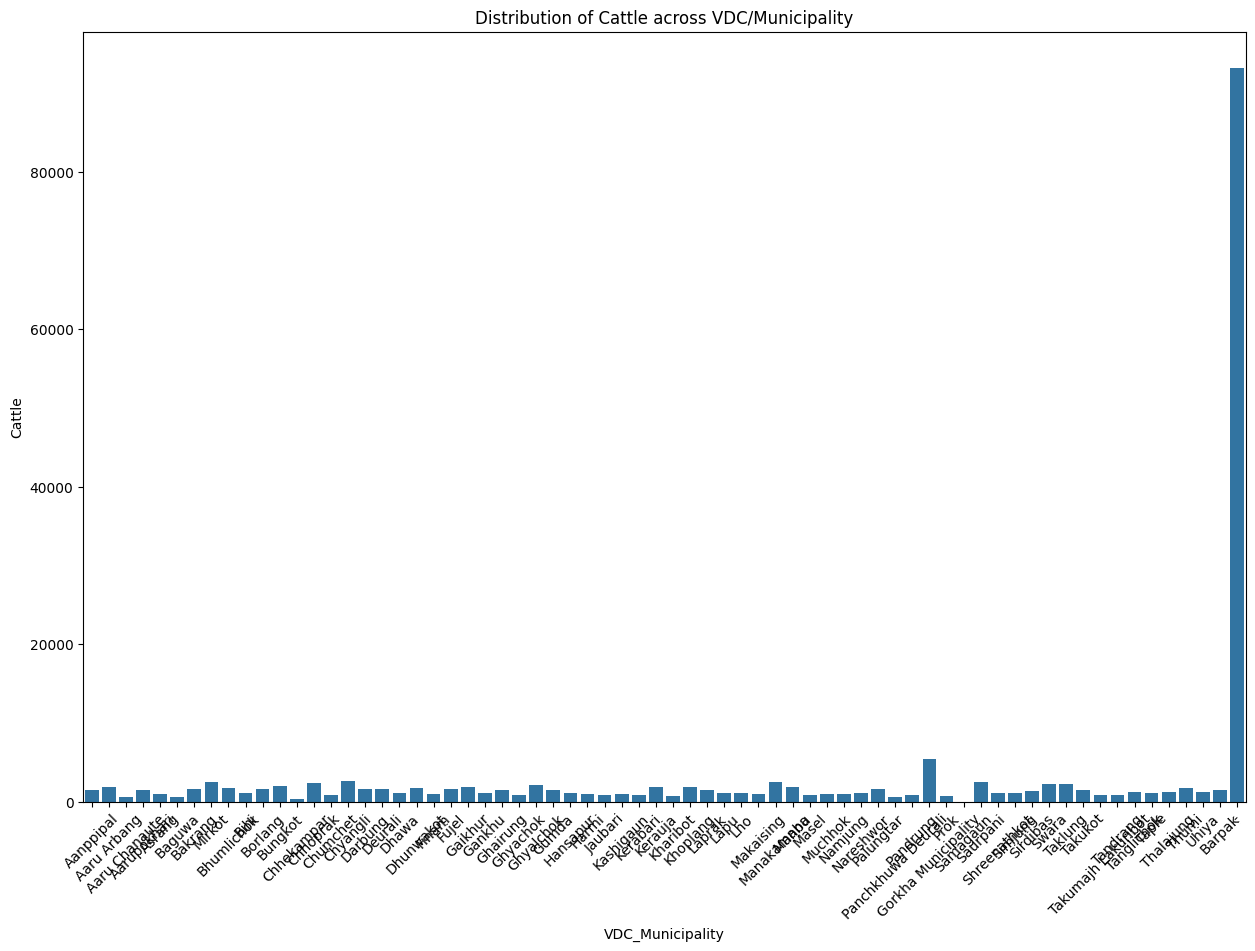

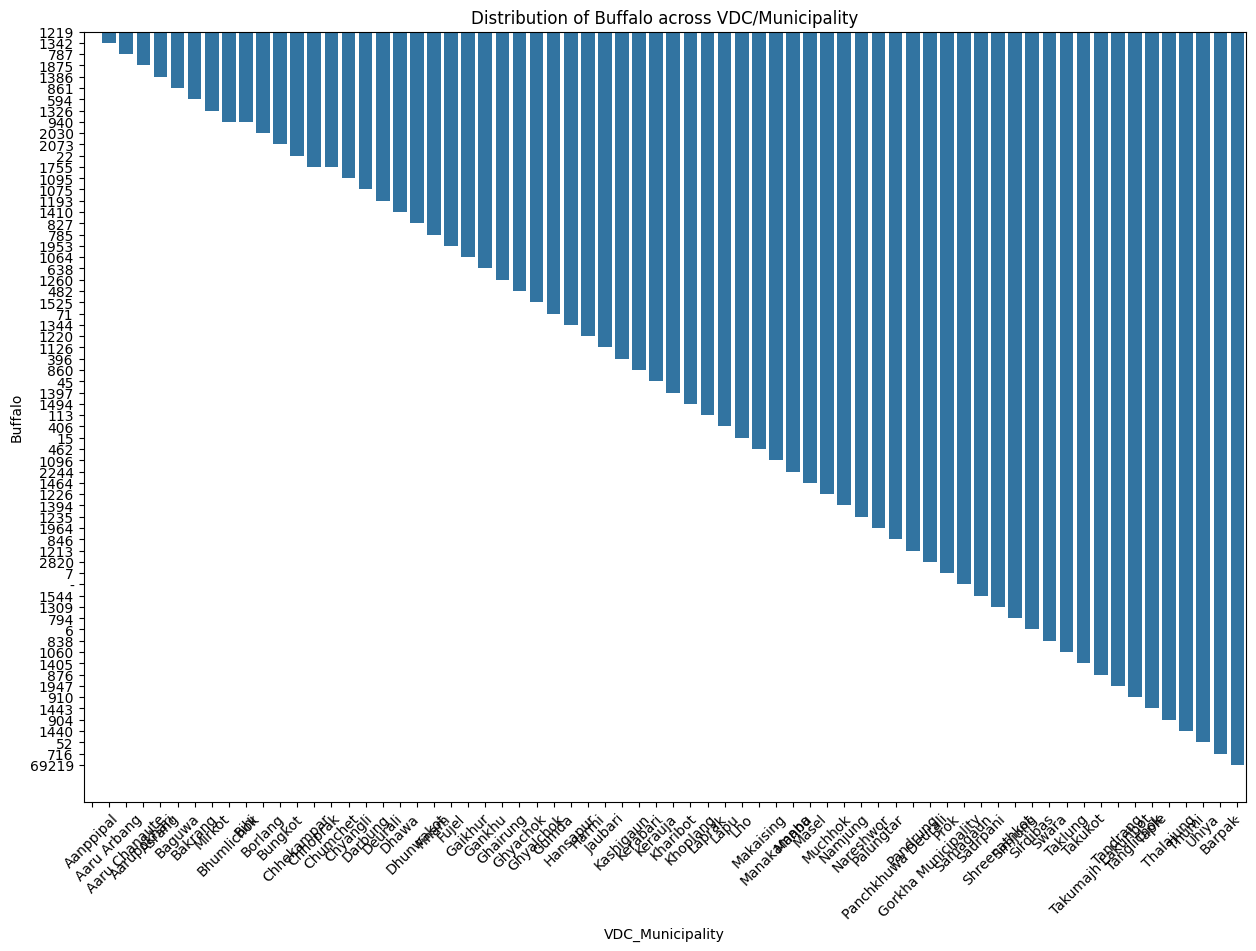

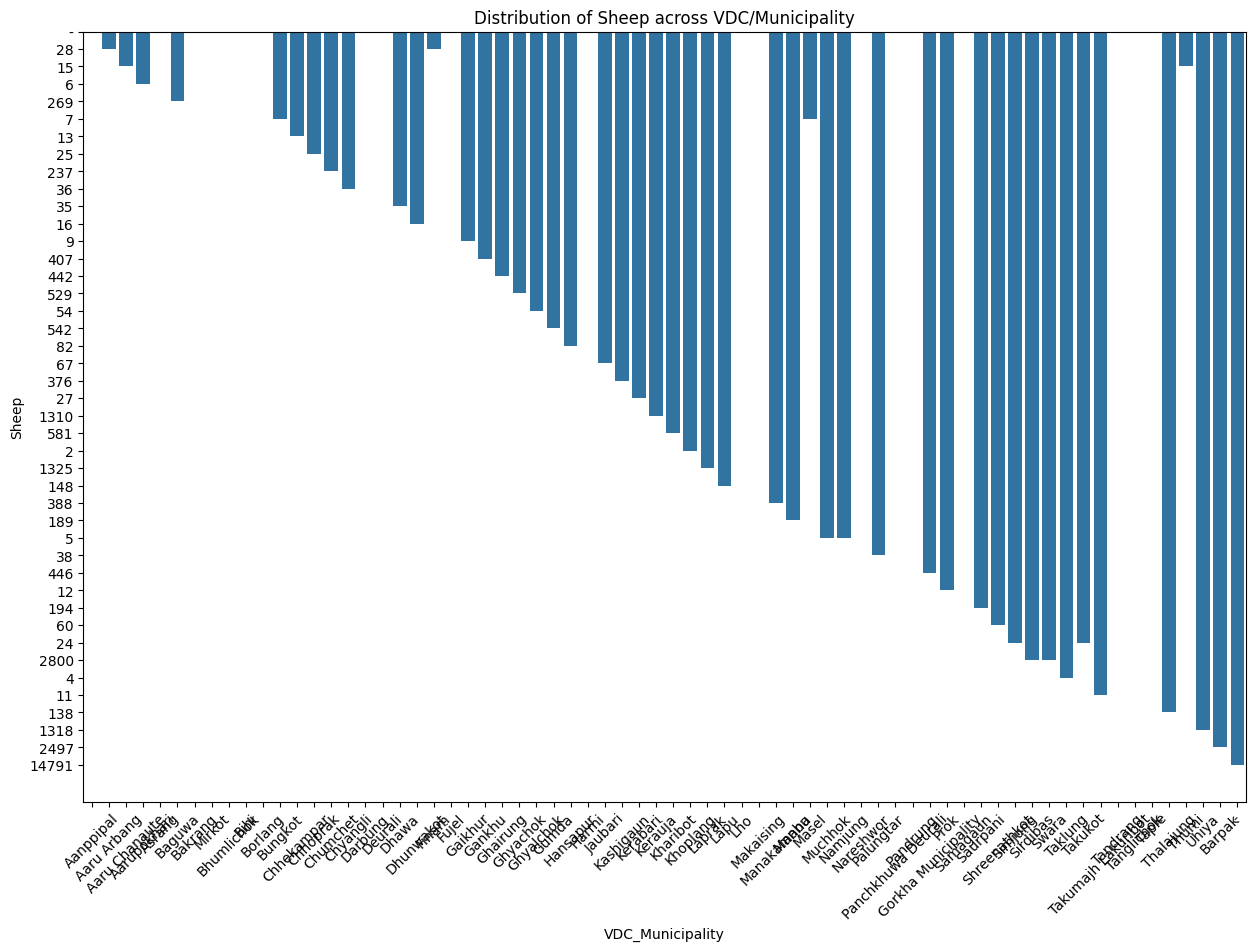

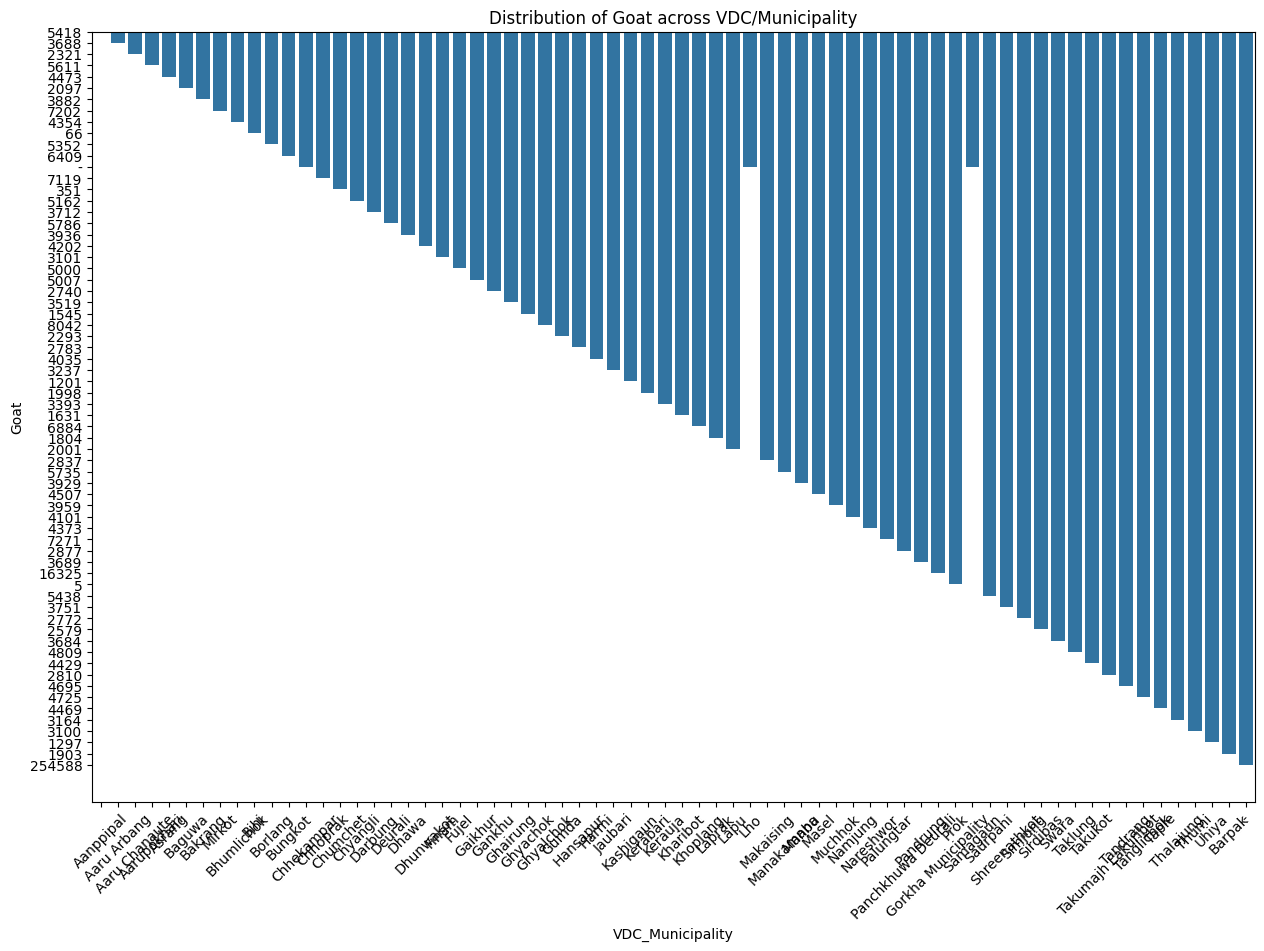

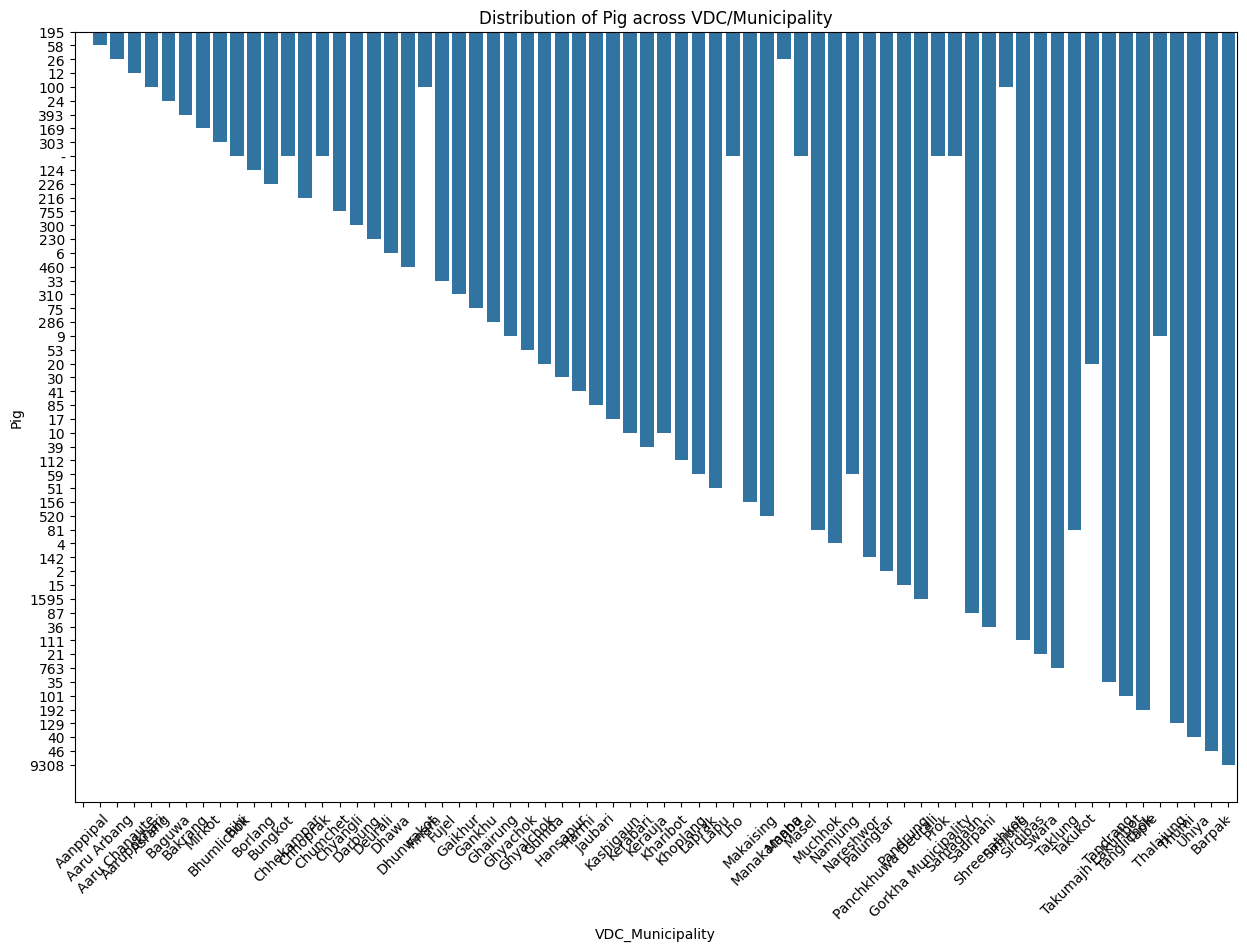

In [16]:

livestock_columns = ['Cattle', 'Buffalo', 'Sheep', 'Goat', 'Pig']

for column in livestock_columns:
    plt.figure(figsize=(15, 10))
    sns.barplot(x='VDC_Municipality', y=column, data=data)
    plt.title(f'Distribution of {column} across VDC/Municipality')
    plt.xticks(rotation=45)
    plt.show()


In [18]:
print(data[livestock_columns].dtypes)

Cattle      int64
Buffalo    object
Sheep      object
Goat       object
Pig        object
dtype: object


In [19]:

data['Buffalo'] = pd.to_numeric(data['Buffalo'], errors='coerce')
data['Sheep'] = pd.to_numeric(data['Sheep'], errors='coerce')
data['Goat'] = pd.to_numeric(data['Goat'], errors='coerce')
data['Pig'] = pd.to_numeric(data['Pig'], errors='coerce')


data[livestock_columns] = data[livestock_columns].fillna(0)


print(data[livestock_columns].dtypes)


Cattle       int64
Buffalo    float64
Sheep      float64
Goat       float64
Pig        float64
dtype: object


# **Sum all livestock counts for each VDC/Municipality**

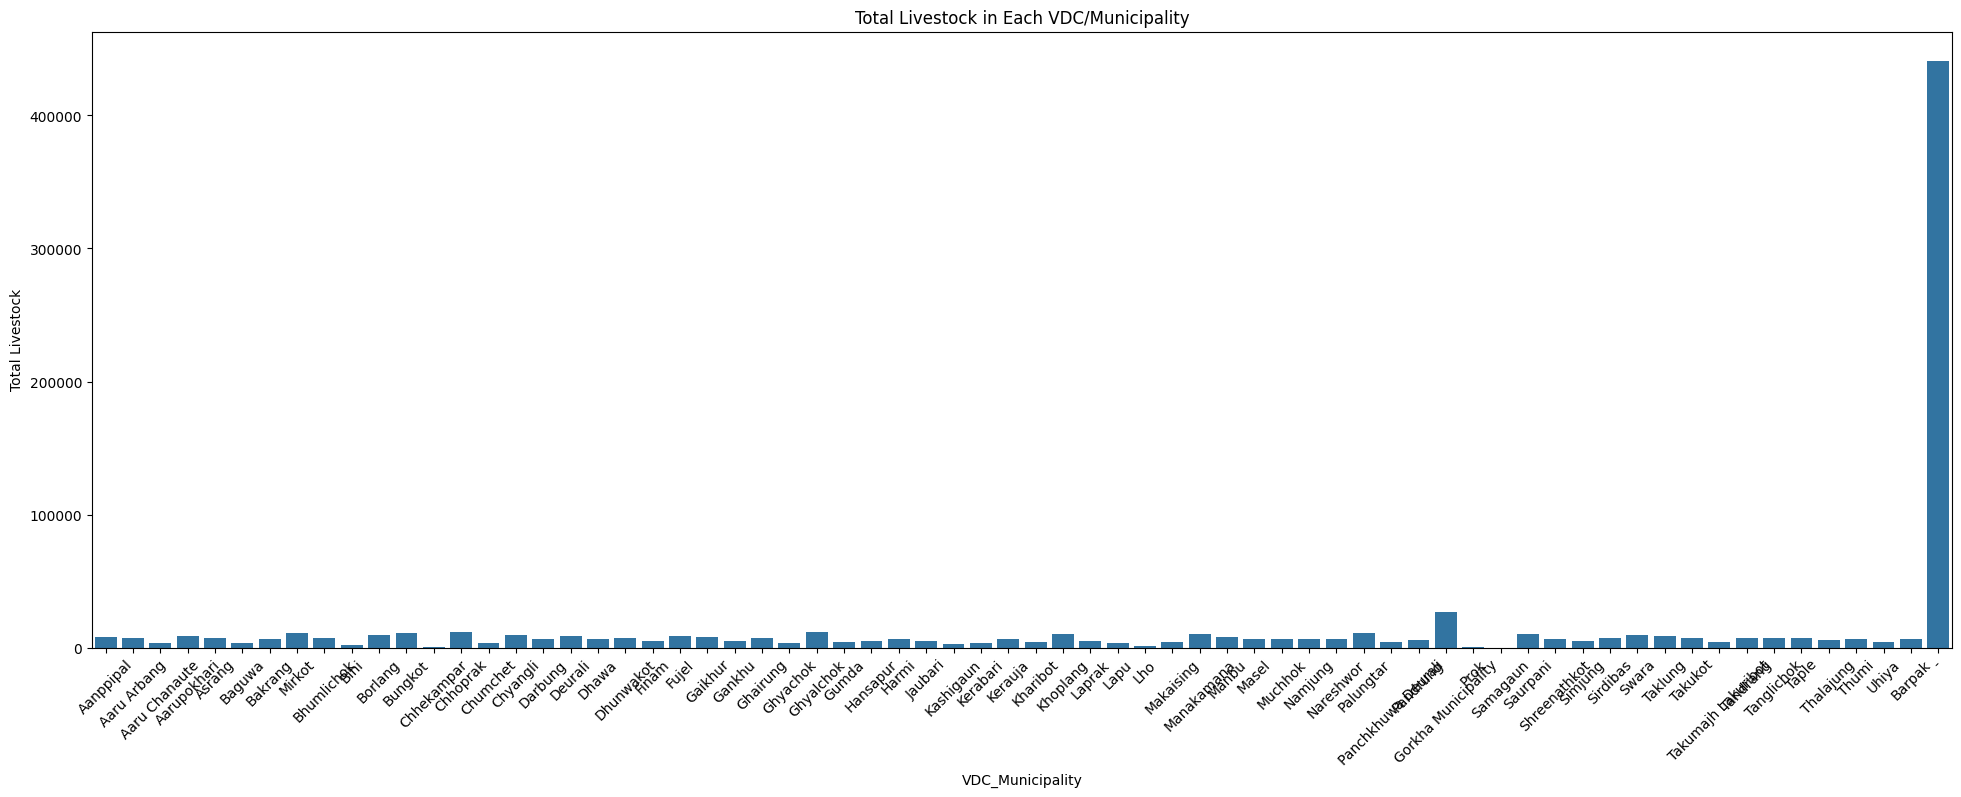

In [23]:

data['Total Livestock'] = data[livestock_columns].sum(axis=1)

# Plot the total livestock counts
plt.figure(figsize=(24, 8))
sns.barplot(x='VDC_Municipality', y='Total Livestock', data=data)
plt.title('Total Livestock in Each VDC/Municipality')
plt.xticks(rotation=45)
plt.show()


# **Stacked bar chart to compare species across municipalities**

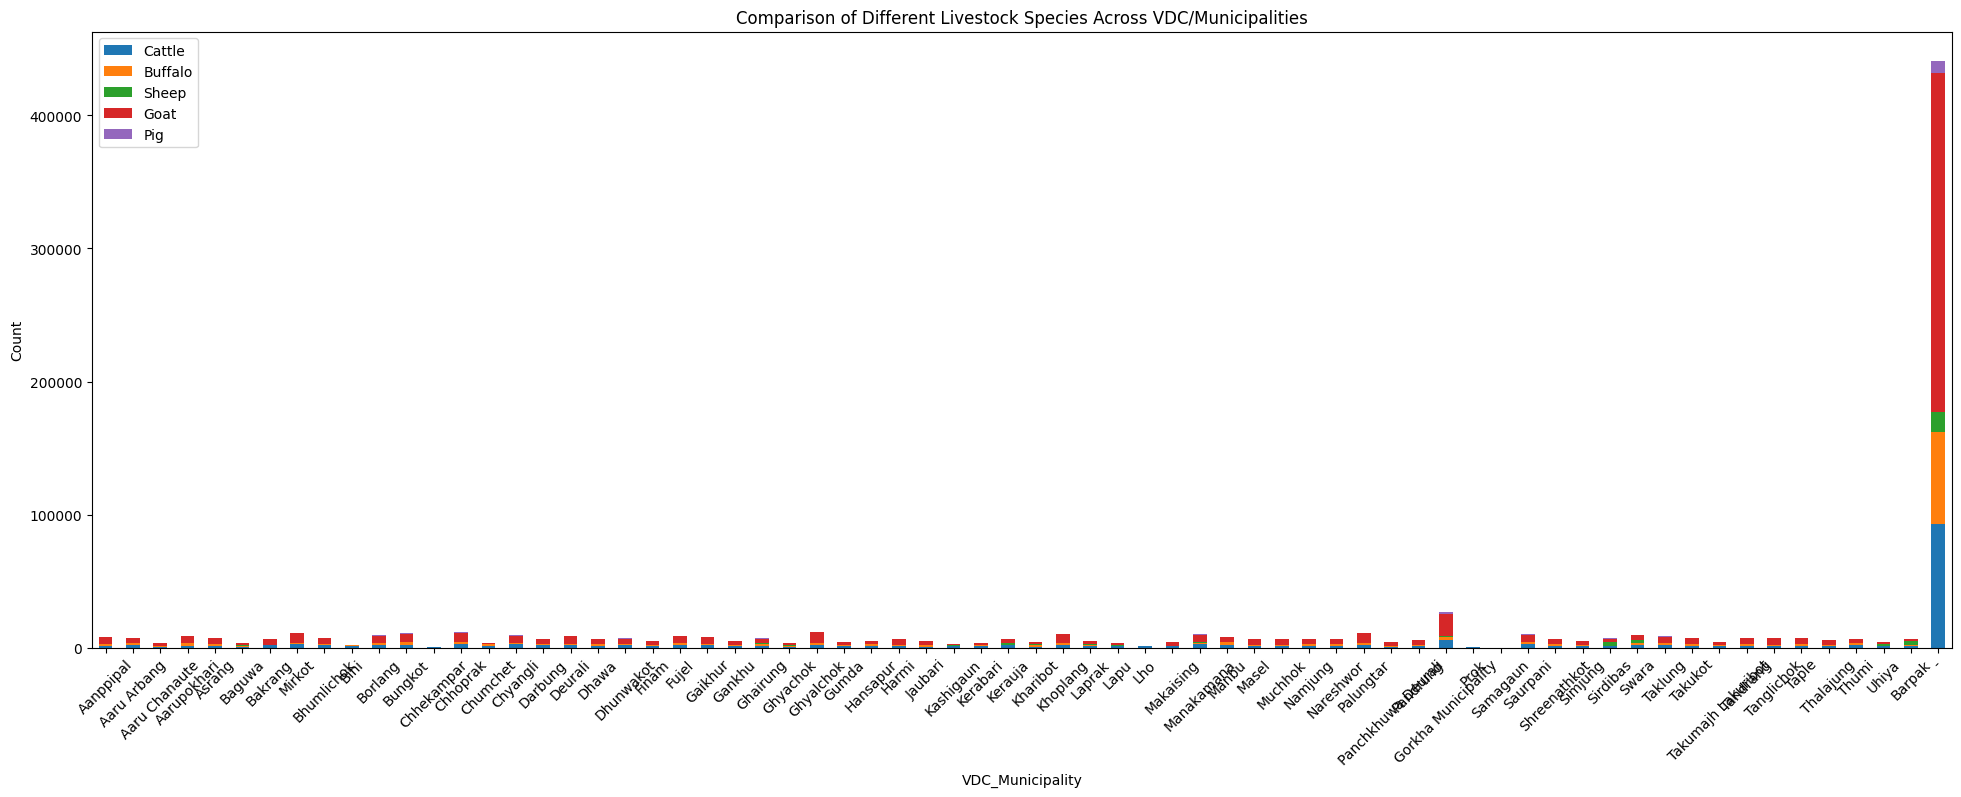

In [25]:

data.set_index('VDC_Municipality')[livestock_columns].plot(kind='bar', stacked=True, figsize=(24, 8))
plt.title('Comparison of Different Livestock Species Across VDC/Municipalities')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()


# **Pie chart for each livestock species' proportion**

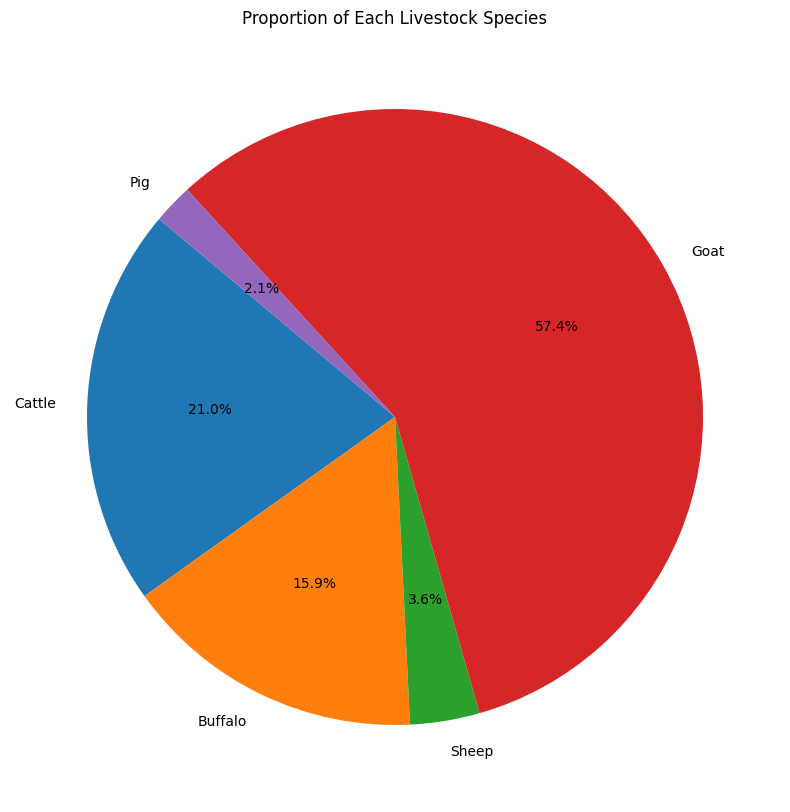

In [28]:

total_counts = data[livestock_columns].sum()

plt.figure(figsize=(10, 10))
plt.pie(total_counts, labels=livestock_columns, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Each Livestock Species')
plt.show()


# **Correlation heatmap between different livestock species**

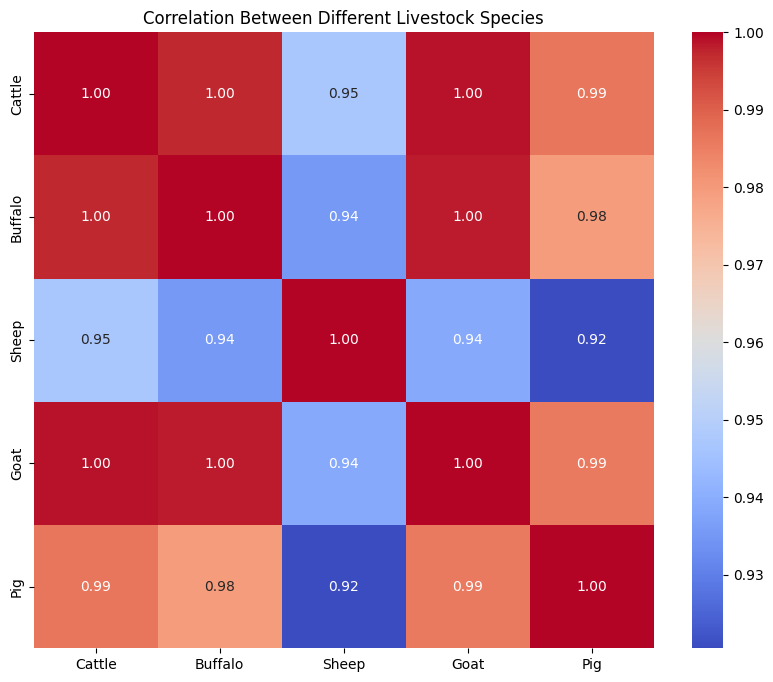

In [31]:

plt.figure(figsize=(10, 8))
corr_matrix = data[livestock_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Different Livestock Species')
plt.show()


# **Boxplot for each species to show distribution across municipalities**

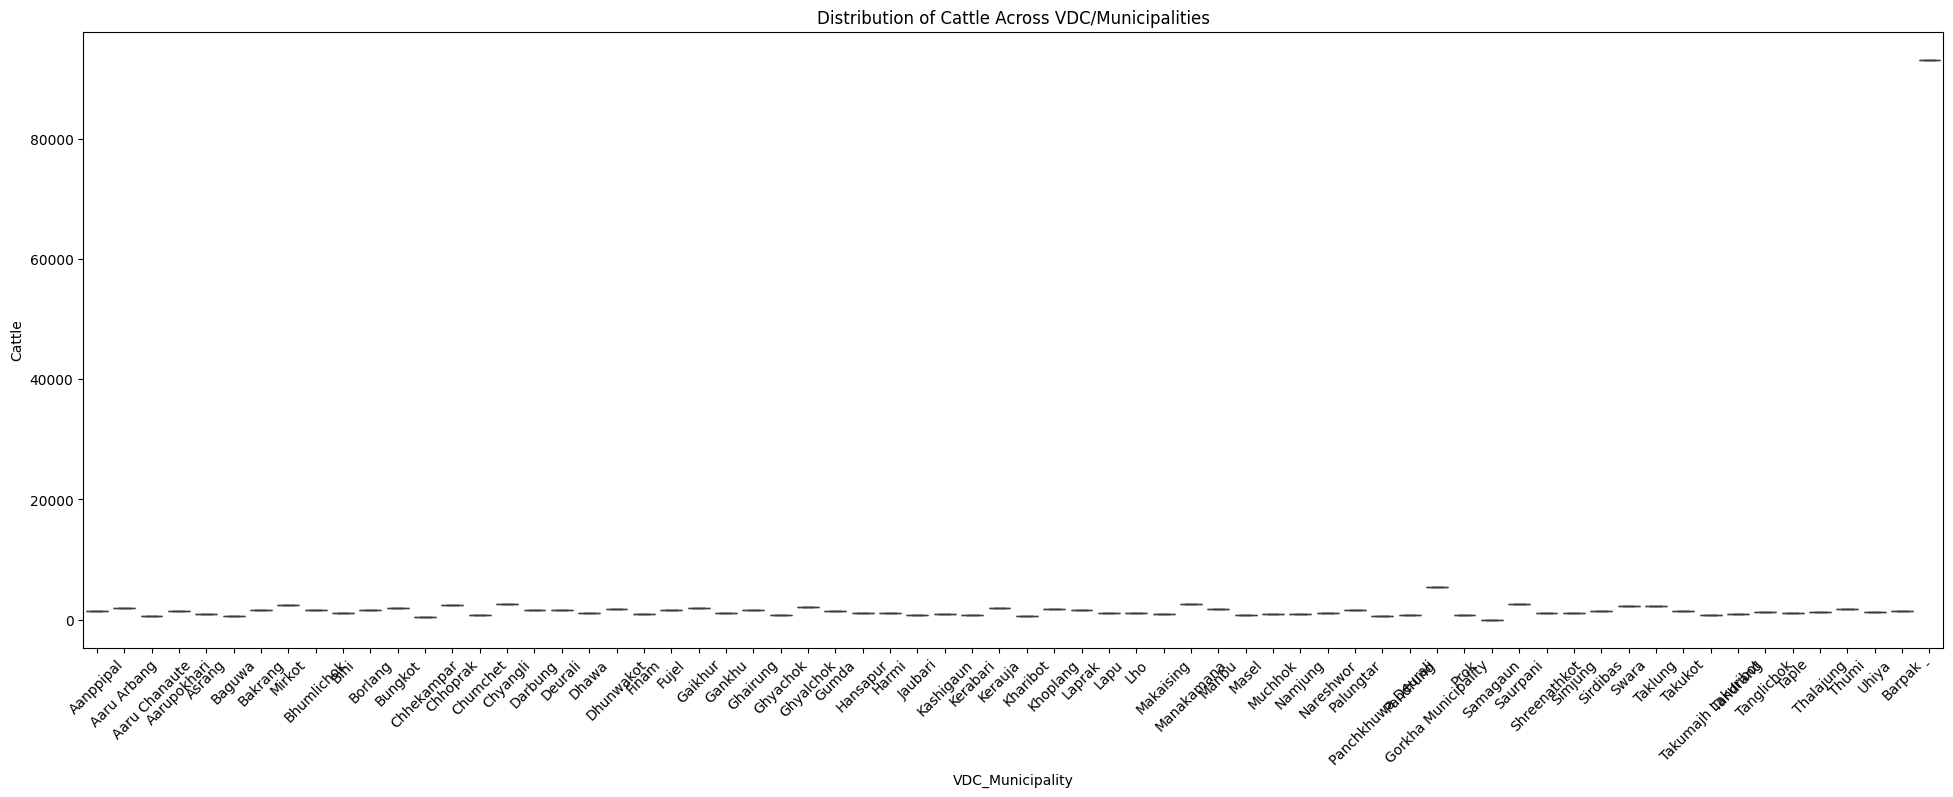

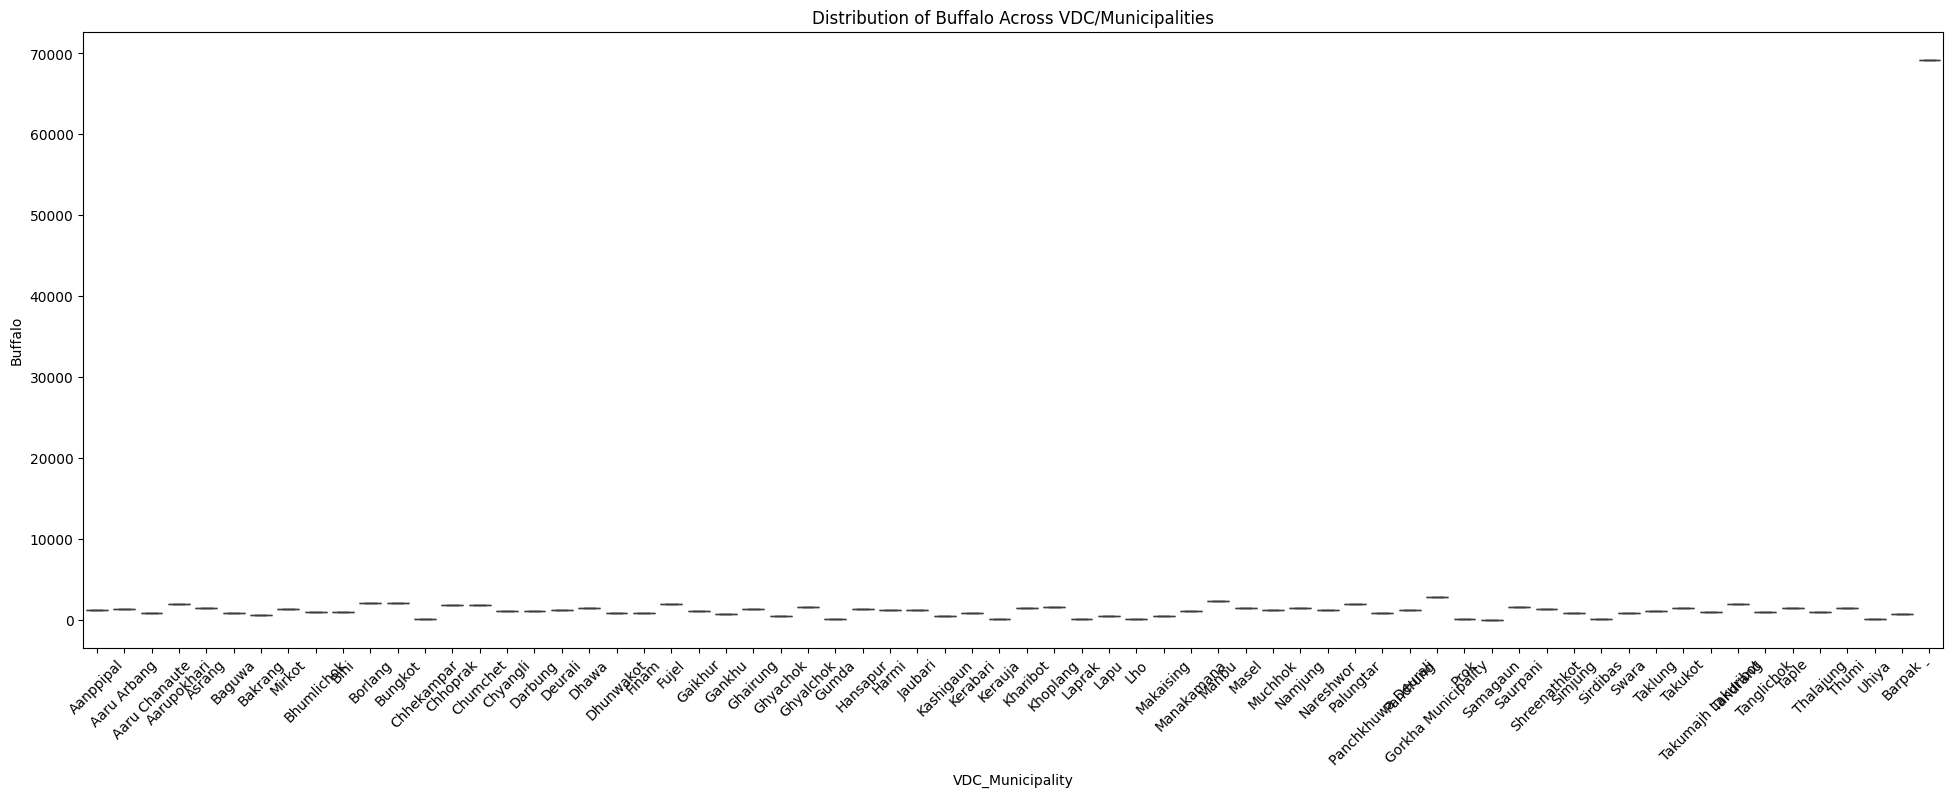

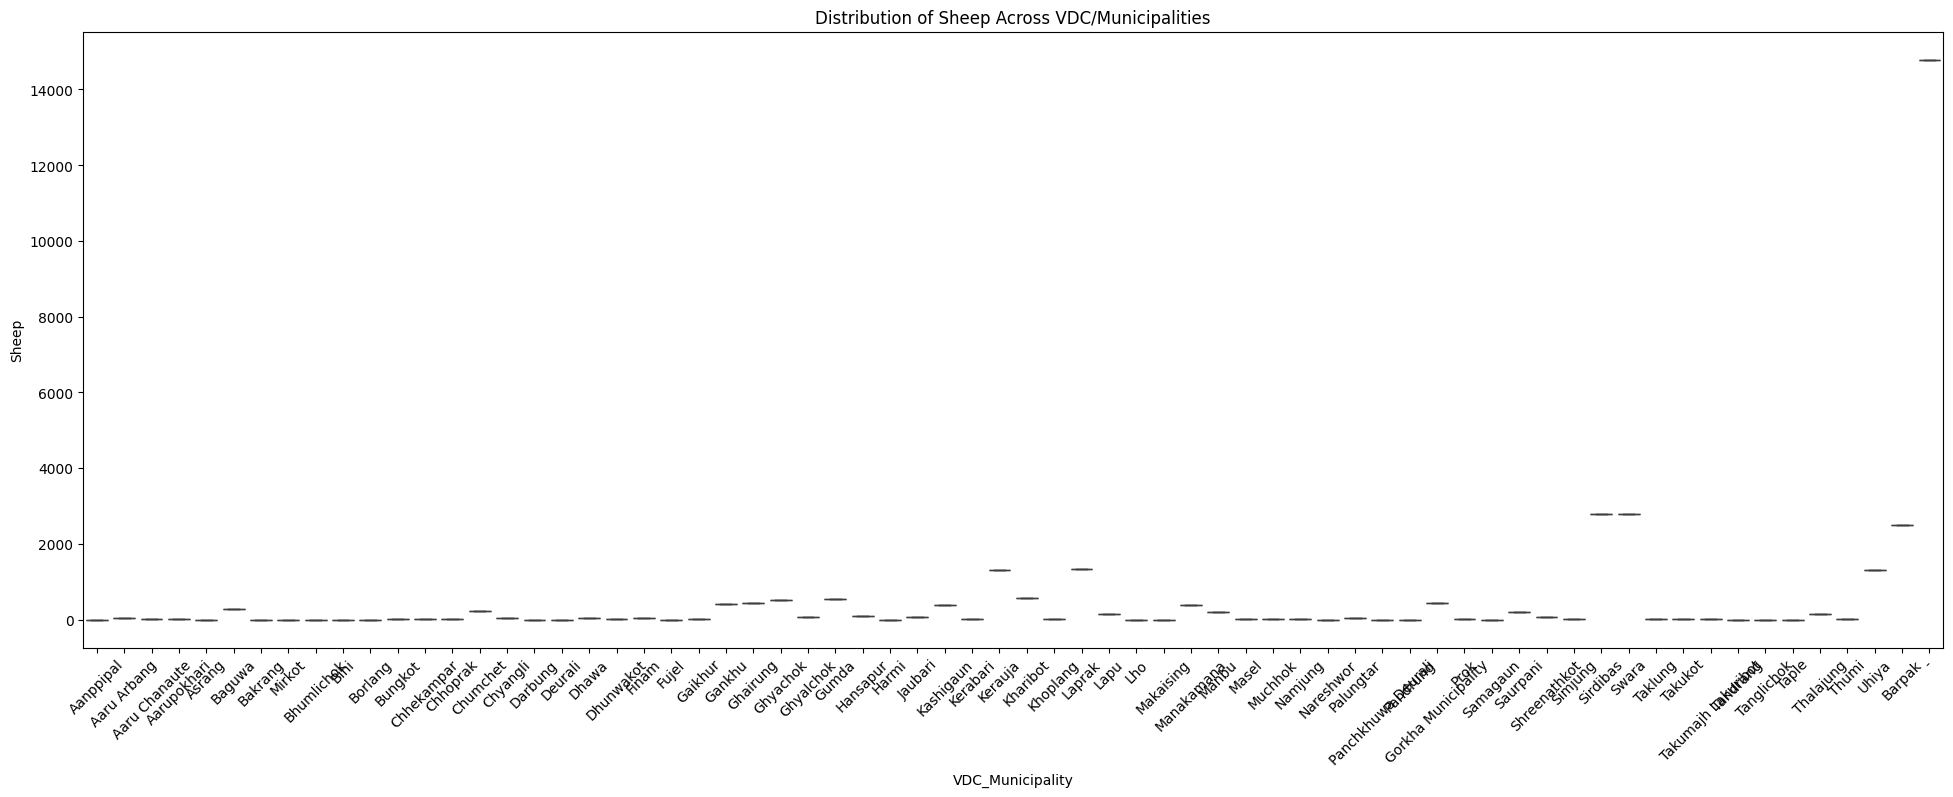

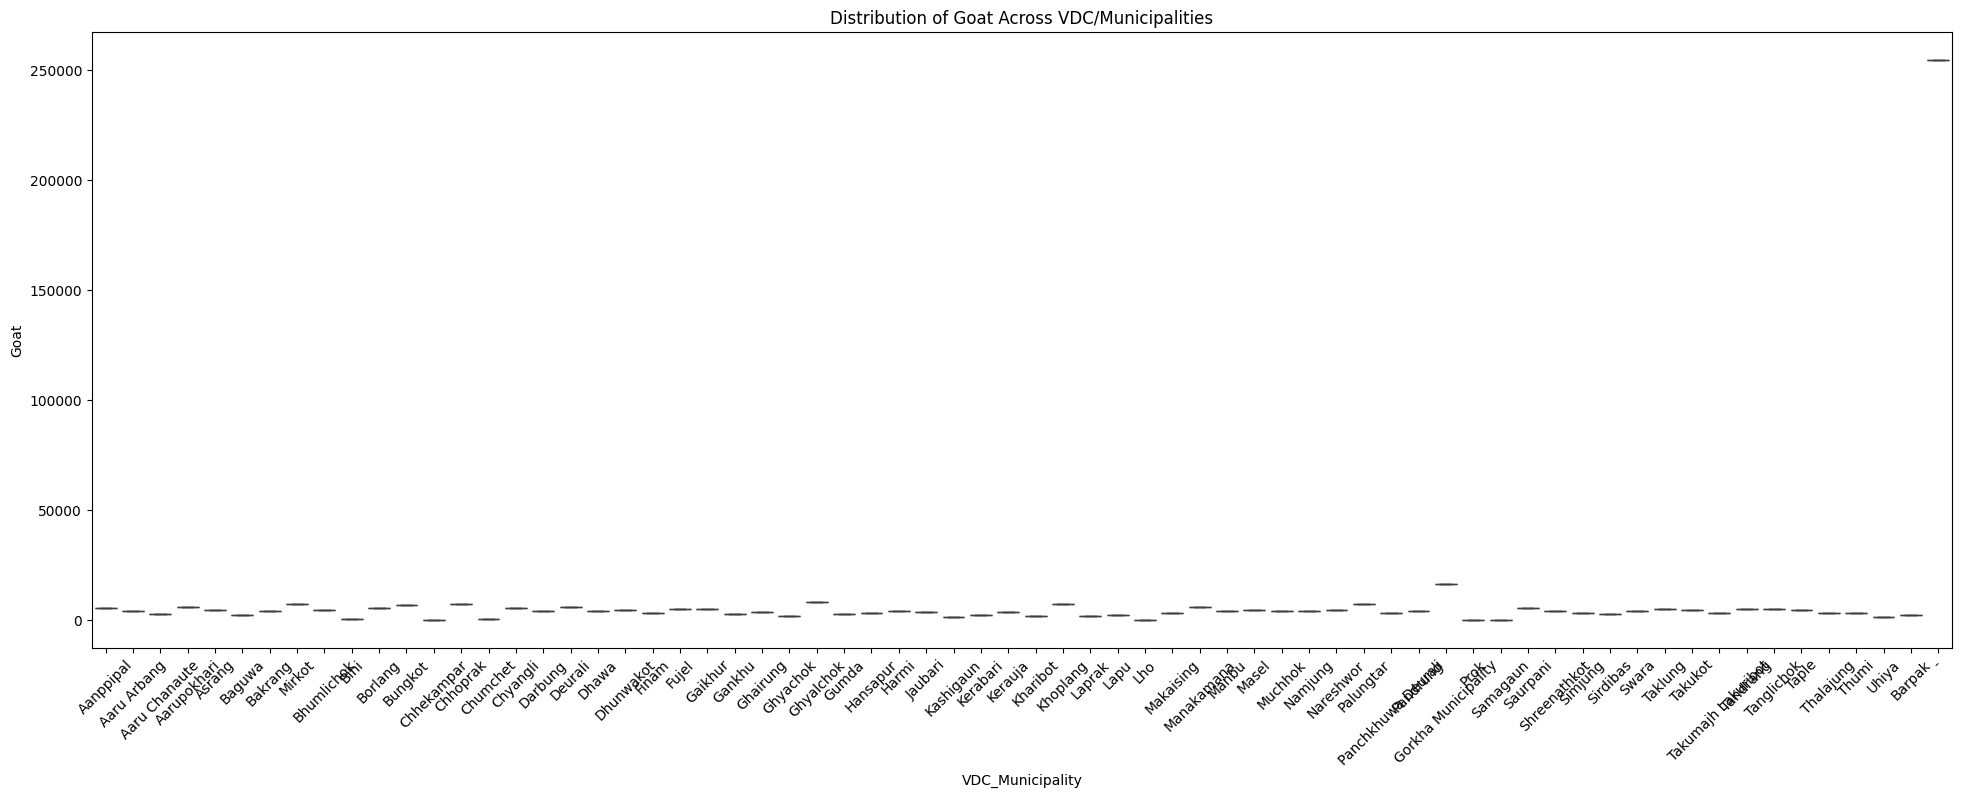

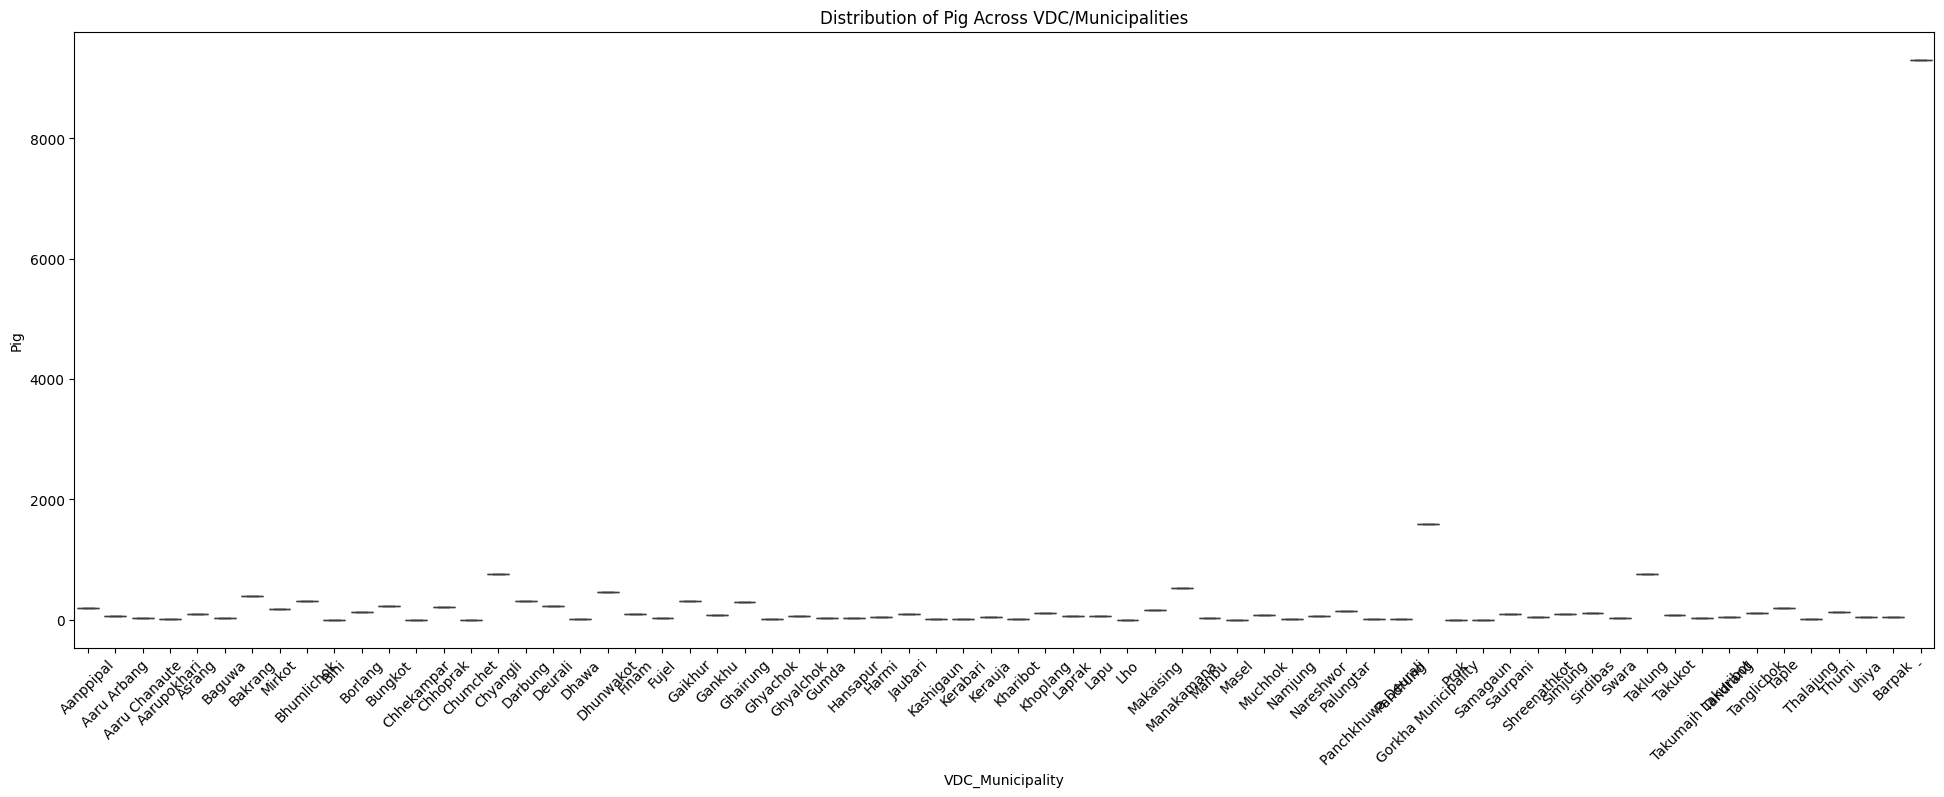

In [34]:

for column in livestock_columns:
    plt.figure(figsize=(24, 8))
    sns.boxplot(x='VDC_Municipality', y=column, data=data)
    plt.title(f'Distribution of {column} Across VDC/Municipalities')
    plt.xticks(rotation=45)
    plt.show()
